<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Package
import os
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

## Step 1: Data Loading

In [2]:
base_dir = "C:\DL\Asg1"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
img_size = 150

## Step 2:  Develop the Image Classification Models

### Model #1

In [3]:
# Build the Model
'''
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512,(3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()
'''

#Build the Model
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3), activation='relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512,(3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
#model.add(layers.Dense(256, activation = 'relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(256,kernel_regularizer=regularizers.l2(0.0001), activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,kernel_regularizer=regularizers.l2(0.0001), activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10,kernel_regularizer=regularizers.l2(0.0001), activation = 'softmax'))
#model.add(layers.Dropout(0.1))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

In [4]:
#Compiling the Model
model.compile(optimizer = optimizers.RMSprop(lr=0.0001), loss = "categorical_crossentropy", metrics=["acc"])
#Compiling the Model
#model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics=["acc"])

In [5]:
# Train the Model

train_data = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

#train_data = ImageDataGenerator(rescale=1./255)
validation_data = ImageDataGenerator(rescale=1./255)

train_data_generator = train_data.flow_from_directory(train_dir, target_size=(img_size,img_size),
                                                      batch_size = 25, class_mode ='categorical')
validation_data_generator = validation_data.flow_from_directory(validation_dir, target_size=(img_size,img_size),
                                                   batch_size=25, class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [6]:
# Checking Generated Data Output 
for data_batch, labels_batch in train_data_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
#Check to see if the shapes are correct
#First value shows the batch size
#The rest of the values shows the shape 

data batch shape: (25, 150, 150, 3)
labels batch shape: (25, 10)


In [7]:
# Fitting the Model
food_model_1_history = model.fit(train_data_generator, steps_per_epoch=300 , epochs=50,
                                 validation_data = validation_data_generator, validation_steps=80)

Train for 300 steps, validate for 80 steps
Epoch 1/50
300/300 [==============================] - 173s 576ms/step - loss: 2.2962 - acc: 0.1596 - val_loss: 2.1583 - val_acc: 0.2310
Epoch 2/50
300/300 [==============================] - 200s 666ms/step - loss: 2.1513 - acc: 0.2361 - val_loss: 2.0454 - val_acc: 0.2590
Epoch 3/50
300/300 [==============================] - 191s 638ms/step - loss: 2.0862 - acc: 0.2667 - val_loss: 1.9743 - val_acc: 0.2970
Epoch 4/50
300/300 [==============================] - 199s 665ms/step - loss: 2.0357 - acc: 0.2885 - val_loss: 1.9589 - val_acc: 0.3305
Epoch 5/50
300/300 [==============================] - 197s 657ms/step - loss: 1.9827 - acc: 0.3129 - val_loss: 1.8892 - val_acc: 0.3335
Epoch 6/50
300/300 [==============================] - 201s 669ms/step - loss: 1.9360 - acc: 0.3303 - val_loss: 1.8345 - val_acc: 0.3830
Epoch 7/50
300/300 [==============================] - 202s 673ms/step - loss: 1.8921 - acc: 0.3584 - val_loss: 1.7718 - val_acc: 0.3980
Epoch

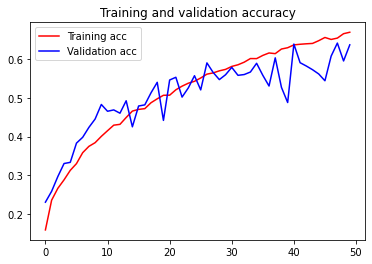

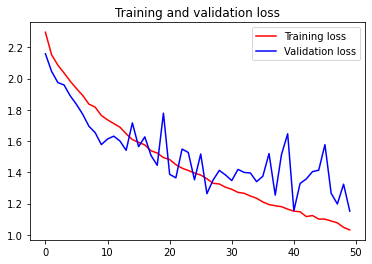

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = food_model_1_history.history['acc']
val_acc = food_model_1_history.history['val_acc']
loss = food_model_1_history.history['loss']
val_loss = food_model_1_history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [10]:
# Building the VGG16 Model
conv_base = VGG16(weights='imagenet', include_top=False, #Place at False since we are only using 10 of our own classes
                  input_shape=(img_size, img_size, 3)) #Pictures are in 3D for it is colour 
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
#Building the Model
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten()) #Makes it a 1D tensor
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu' ))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.01), activation='softmax'))
model2.add(layers.Dropout(0.1))
model2.summary()
  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [12]:
# Train the Model

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=25,
        # Since we are using multiple classes, categorical must be used
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

#conv_base.trainable = False

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # when name of layer is black5_conv1, set_trainable becomes True
    if layer.name == 'block4_conv1':
        set_trainable = True # when name of layer is black4_conv1, set_trainable becomes True
    if layer.name == 'block3_conv1':
        set_trainable = True # when name of layer is black3_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [13]:
#Compiling the Model 

model2.compile(loss='categorical_crossentropy', 
              optimizer = optimizers.RMSprop(lr=0.00001),
              metrics=['acc'])

In [ ]:
# Fitting the Model 
food_model_2_history = model.fit(train_generator,steps_per_epoch=300,epochs=30,
                                validation_data=validation_generator,validation_steps=80)

Train for 300 steps, validate for 80 steps
Epoch 1/30
300/300 [==============================] - 210s 701ms/step - loss: 1.0469 - acc: 0.6733 - val_loss: 1.2772 - val_acc: 0.6185
Epoch 2/30
300/300 [==============================] - 209s 696ms/step - loss: 1.0287 - acc: 0.6697 - val_loss: 1.3151 - val_acc: 0.5945
Epoch 3/30
300/300 [==============================] - 194s 648ms/step - loss: 1.0305 - acc: 0.6744 - val_loss: 1.2582 - val_acc: 0.6230
Epoch 4/30
300/300 [==============================] - 200s 666ms/step - loss: 1.0003 - acc: 0.6861 - val_loss: 1.1491 - val_acc: 0.6440
Epoch 5/30


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores

%matplotlib inline

acc = food_model_2_history.history['acc']
val_acc = food_model_2_history.history['val_acc']
loss = food_model_2_history.history['loss']
val_loss = food_model_2_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# Save the Model
model2.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [ ]:
# Model #1
model.load_weights('food_model_1.h5')
test_data = ImageDataGenerator(rescale=1./255)
test_data_generator = test_data.flow_from_directory(test_dir, target_size=(img_size,img_size),
                                                   batch_size=25, class_mode='categorical')
test_loss,test_acc = model.evaluate(test_data_generator, steps =20)
print("test acc: ",test_acc)
print("test loss: ",test_loss)



In [ ]:
# Model #2
model2.load_weights('food_model_2.h5')
test_data = ImageDataGenerator(rescale=1./255)
test_data_generator = test_data.flow_from_directory(test_dir, target_size=(img_size,img_size),
                                                   batch_size=25, class_mode='categorical')
test_loss,test_acc = model2.evaluate(test_data_generator, steps =20)
print("test acc: ",test_acc)
print("test loss: ",test_loss)



In [ ]:
# Save the best model
model2.load_weights('food_model_2.h5')
model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [ ]:
# Load the model
model2.load_weights('food_model_best.h5')

In [ ]:
# Load the food list (in alphabetical order)
with open('13.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [ ]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
# Make prediction for the image you downloaded from internet
img1 = 'gyozatest.jpg' # the first picture you downloaded from internet, which contains a type of food in your food list
img2 = 'tartaretest.jpg' # the second picture you downloaded from internet, which contains a type of food in your food list
img3 = 'omelettetest.jpg' # the third picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img1))
plt.show()
img1_array = image_process(img1)
prob1_df, result1 = prediction(model2, img1_array, food_list)
print('The prediction is: ', result1, '\n\n', prob1_df)
plt.imshow(plt.imread(img2))
plt.show()
img2_array = image_process(img2)
prob2_df, result2 = prediction(model2, img2_array, food_list)
print('The prediction is: ', result2, '\n\n', prob2_df)
plt.imshow(plt.imread(img3))
plt.show()
img3_array = image_process(img3)
prob3_df, result3 = prediction(model2, img3_array, food_list)
print('The prediction is: ', result3, '\n\n', prob3_df)
